In [1]:
# Import required libraries and set display configurations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for high-resolution plots in Jupyter
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.unicode_minus'] = False

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Generate synthetic datasets for ANOVA analysis
# One-way ANOVA data: 3 groups with different means
n_per_group = 30
group1 = np.random.normal(loc=10, scale=2, size=n_per_group)  # Mean = 10
group2 = np.random.normal(loc=12, scale=2, size=n_per_group)  # Mean = 12
group3 = np.random.normal(loc=11, scale=2, size=n_per_group)  # Mean = 11

# Create one-way ANOVA dataframe
one_way_df = pd.DataFrame({
    'value': np.concatenate([group1, group2, group3]),
    'group': ['Group A'] * n_per_group + ['Group B'] * n_per_group + ['Group C'] * n_per_group
})

# Two-way ANOVA data: 2 factors (treatment and location) with interaction
n_per_cell = 20
# Factor 1: Treatment (2 levels: Control, Treatment)
# Factor 2: Location (3 levels: North, South, East)
# Create all combinations
treatments = ['Control', 'Treatment']
locations = ['North', 'South', 'East']

two_way_data = []
for treatment in treatments:
    for location in locations:
        # Add some interaction effects
        base_mean = 10
        if treatment == 'Treatment':
            base_mean += 3  # Treatment effect
        if location == 'South':
            base_mean += 2  # Location effect
        if treatment == 'Treatment' and location == 'South':
            base_mean += 1.5  # Interaction effect

        values = np.random.normal(loc=base_mean, scale=1.5, size=n_per_cell)
        for val in values:
            two_way_data.append({'value': val, 'treatment': treatment, 'location': location})

two_way_df = pd.DataFrame(two_way_data)

# Display basic information about the datasets
print("One-Way ANOVA Dataset:")
print(f"Total samples: {len(one_way_df)}")
print(f"Groups: {one_way_df['group'].unique()}")
print(f"Samples per group: {n_per_group}")

print("\nTwo-Way ANOVA Dataset:")
print(f"Total samples: {len(two_way_df)}")
print(f"Treatments: {two_way_df['treatment'].unique()}")
print(f"Locations: {two_way_df['location'].unique()}")
print(f"Samples per treatment-location combination: {n_per_cell}")

print("\nSummary Statistics for One-Way ANOVA:")
print(one_way_df.groupby('group')['value'].agg(['mean', 'std', 'count']))

One-Way ANOVA Dataset:
Total samples: 90
Groups: ['Group A' 'Group B' 'Group C']
Samples per group: 30

Two-Way ANOVA Dataset:
Total samples: 120
Treatments: ['Control' 'Treatment']
Locations: ['North' 'South' 'East']
Samples per treatment-location combination: 20

Summary Statistics for One-Way ANOVA:
              mean       std  count
group                              
Group A   9.623706  1.800013     30
Group B  11.757675  1.862204     30
Group C  11.025770  1.983966     30


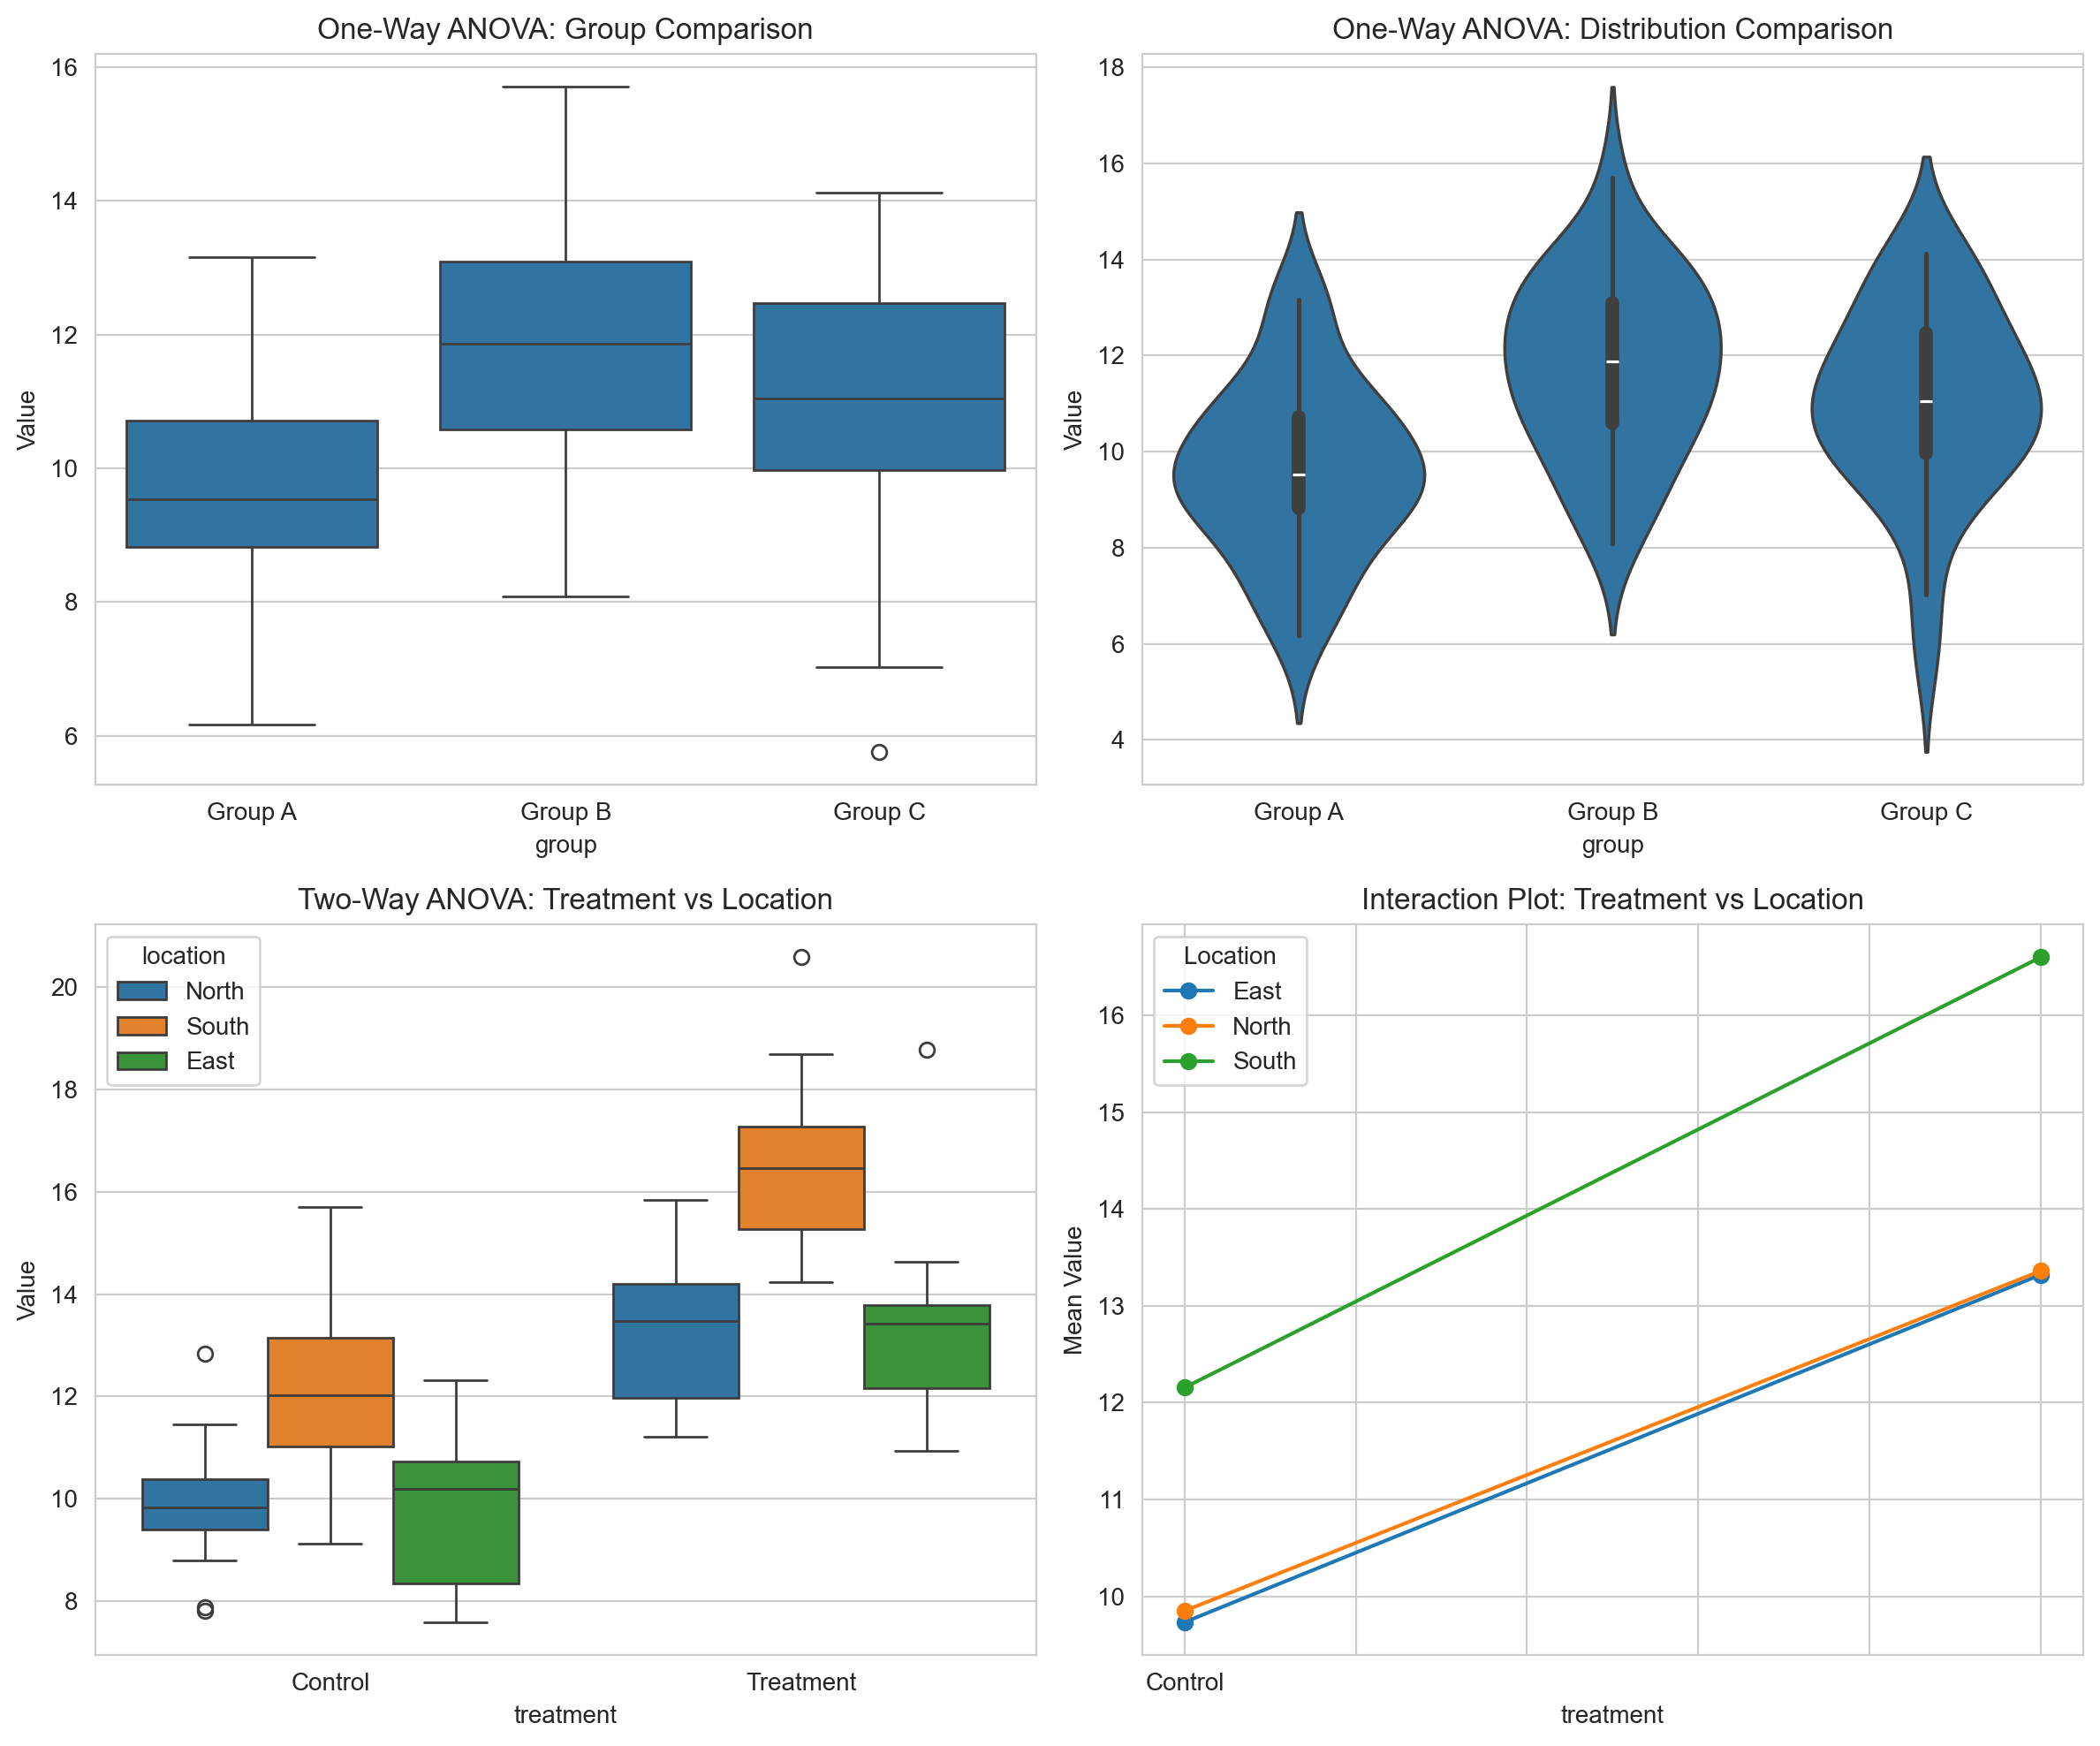


Summary Statistics for Two-Way ANOVA:
                         mean       std  count
treatment location                            
Control   East       9.733901  1.458606     20
          North      9.851028  1.122910     20
          South     12.155849  1.720535     20
Treatment East      13.319378  1.722627     20
          North     13.358421  1.345832     20
          South     16.597053  1.465864     20


In [3]:
# Exploratory Data Analysis
fig, axes = plt.subplots(2, 2)

# Box plot for one-way ANOVA
sns.boxplot(data=one_way_df, x='group', y='value', ax=axes[0,0])
axes[0,0].set_title('One-Way ANOVA: Group Comparison')
axes[0,0].set_ylabel('Value')

# Violin plot for one-way ANOVA
sns.violinplot(data=one_way_df, x='group', y='value', ax=axes[0,1])
axes[0,1].set_title('One-Way ANOVA: Distribution Comparison')
axes[0,1].set_ylabel('Value')

# Box plot for two-way ANOVA
sns.boxplot(data=two_way_df, x='treatment', y='value', hue='location', ax=axes[1,0])
axes[1,0].set_title('Two-Way ANOVA: Treatment vs Location')
axes[1,0].set_ylabel('Value')

# Interaction plot for two-way ANOVA
interaction_means = two_way_df.groupby(['treatment', 'location'])['value'].mean().unstack()
interaction_means.plot(kind='line', marker='o', ax=axes[1,1])
axes[1,1].set_title('Interaction Plot: Treatment vs Location')
axes[1,1].set_ylabel('Mean Value')
axes[1,1].legend(title='Location')

plt.tight_layout()
plt.show()

# Summary statistics for two-way ANOVA
print("\nSummary Statistics for Two-Way ANOVA:")
print(two_way_df.groupby(['treatment', 'location'])['value'].agg(['mean', 'std', 'count']))

In [5]:
# One-Way ANOVA Analysis
print("=== ONE-WAY ANOVA ANALYSIS ===")

# Calculate group statistics
group_stats = one_way_df.groupby('group')['value'].agg(['mean', 'std', 'count']).reset_index()
grand_mean = one_way_df['value'].mean()

print("Group Statistics:")
print(group_stats)
print(f"\nGrand Mean: {grand_mean:.4f}")

# Perform One-Way ANOVA
f_stat_1way, p_value_1way = stats.f_oneway(
    one_way_df[one_way_df['group'] == 'Group A']['value'],
    one_way_df[one_way_df['group'] == 'Group B']['value'],
    one_way_df[one_way_df['group'] == 'Group C']['value']
)

# Manual calculation for understanding
n_groups = len(group_stats)
n_total = len(one_way_df)
df_between = n_groups - 1
df_within = n_total - n_groups

# Calculate sums of squares
ss_between = sum([group_stats.iloc[i]['count'] * (group_stats.iloc[i]['mean'] - grand_mean)**2
                  for i in range(n_groups)])
ss_within = sum([(group_stats.iloc[i]['count'] - 1) * group_stats.iloc[i]['std']**2
                 for i in range(n_groups)])
ss_total = ss_between + ss_within

# Calculate mean squares
ms_between = ss_between / df_between
ms_within = ss_within / df_within

eta_squared = ss_between / ss_total  # Effect size

print(f"\nOne-Way ANOVA Results:")
print(f"F-statistic: {f_stat_1way:.4f}")
print(f"p-value: {p_value_1way:.4f}")
print(f"Degrees of freedom (between, within): ({df_between}, {df_within})")
print(f"Sum of Squares (between, within, total): ({ss_between:.4f}, {ss_within:.4f}, {ss_total:.4f})")
print(f"Mean Squares (between, within): ({ms_between:.4f}, {ms_within:.4f})")
print(f"Effect Size (Eta-squared): {eta_squared:.4f}")
print(f"Decision (α=0.05): {'Reject H₀' if p_value_1way < 0.05 else 'Fail to reject H₀'}")

# Post-hoc analysis (Tukey's HSD) if significant
if p_value_1way < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey_result = pairwise_tukeyhsd(endog=one_way_df['value'], groups=one_way_df['group'], alpha=0.05)
    print(f"\nPost-hoc Tukey HSD Test:")
    print(tukey_result)

=== ONE-WAY ANOVA ANALYSIS ===
Group Statistics:
     group       mean       std  count
0  Group A   9.623706  1.800013     30
1  Group B  11.757675  1.862204     30
2  Group C  11.025770  1.983966     30

Grand Mean: 10.8024

One-Way ANOVA Results:
F-statistic: 9.9427
p-value: 0.0001
Degrees of freedom (between, within): (2, 87)
Sum of Squares (between, within, total): (70.5529, 308.6752, 379.2281)
Mean Squares (between, within): (35.2765, 3.5480)
Effect Size (Eta-squared): 0.1860
Decision (α=0.05): Reject H₀

Post-hoc Tukey HSD Test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Group A Group B    2.134 0.0001  0.9743 3.2937   True
Group A Group C   1.4021 0.0136  0.2424 2.5617   True
Group B Group C  -0.7319 0.2936 -1.8916 0.4278  False
-----------------------------------------------------


In [6]:
# Two-Way ANOVA Analysis
print("=== TWO-WAY ANOVA ANALYSIS ===")

# Using statsmodels for two-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('value ~ C(treatment) + C(location) + C(treatment):C(location)', data=two_way_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Two-Way ANOVA Results:")
print(anova_table)

# Calculate effect sizes (partial eta squared)
ss_treatment = anova_table.loc['C(treatment)', 'sum_sq']
ss_location = anova_table.loc['C(location)', 'sum_sq']
ss_interaction = anova_table.loc['C(treatment):C(location)', 'sum_sq']
ss_error = anova_table.loc['Residual', 'sum_sq']

total_ss = ss_treatment + ss_location + ss_interaction + ss_error

partial_eta_sq_treatment = ss_treatment / (ss_treatment + ss_error)
partial_eta_sq_location = ss_location / (ss_location + ss_error)
partial_eta_sq_interaction = ss_interaction / (ss_interaction + ss_error)

print(f"\nEffect Sizes (Partial Eta Squared):")
print(f"Treatment: {partial_eta_sq_treatment:.4f}")
print(f"Location: {partial_eta_sq_location:.4f}")
print(f"Interaction: {partial_eta_sq_interaction:.4f}")

# Interpretation of results
alpha = 0.05
treatment_p = anova_table.loc['C(treatment)', 'PR(>F)']
location_p = anova_table.loc['C(location)', 'PR(>F)']
interaction_p = anova_table.loc['C(treatment):C(location)', 'PR(>F)']

print(f"\nInterpretation:")
print(f"Treatment effect significant (α=0.05): {'Yes' if treatment_p < alpha else 'No'}")
print(f"Location effect significant (α=0.05): {'Yes' if location_p < alpha else 'No'}")
print(f"Interaction effect significant (α=0.05): {'Yes' if interaction_p < alpha else 'No'}")

=== TWO-WAY ANOVA ANALYSIS ===
Two-Way ANOVA Results:
                              sum_sq     df           F        PR(>F)
C(treatment)              443.449585    1.0  200.411687  7.151056e-27
C(location)               210.799835    2.0   47.634220  9.193131e-16
C(treatment):C(location)    5.367904    2.0    1.212980  3.011179e-01
Residual                  252.247029  114.0         NaN           NaN

Effect Sizes (Partial Eta Squared):
Treatment: 0.6374
Location: 0.4552
Interaction: 0.0208

Interpretation:
Treatment effect significant (α=0.05): Yes
Location effect significant (α=0.05): Yes
Interaction effect significant (α=0.05): No


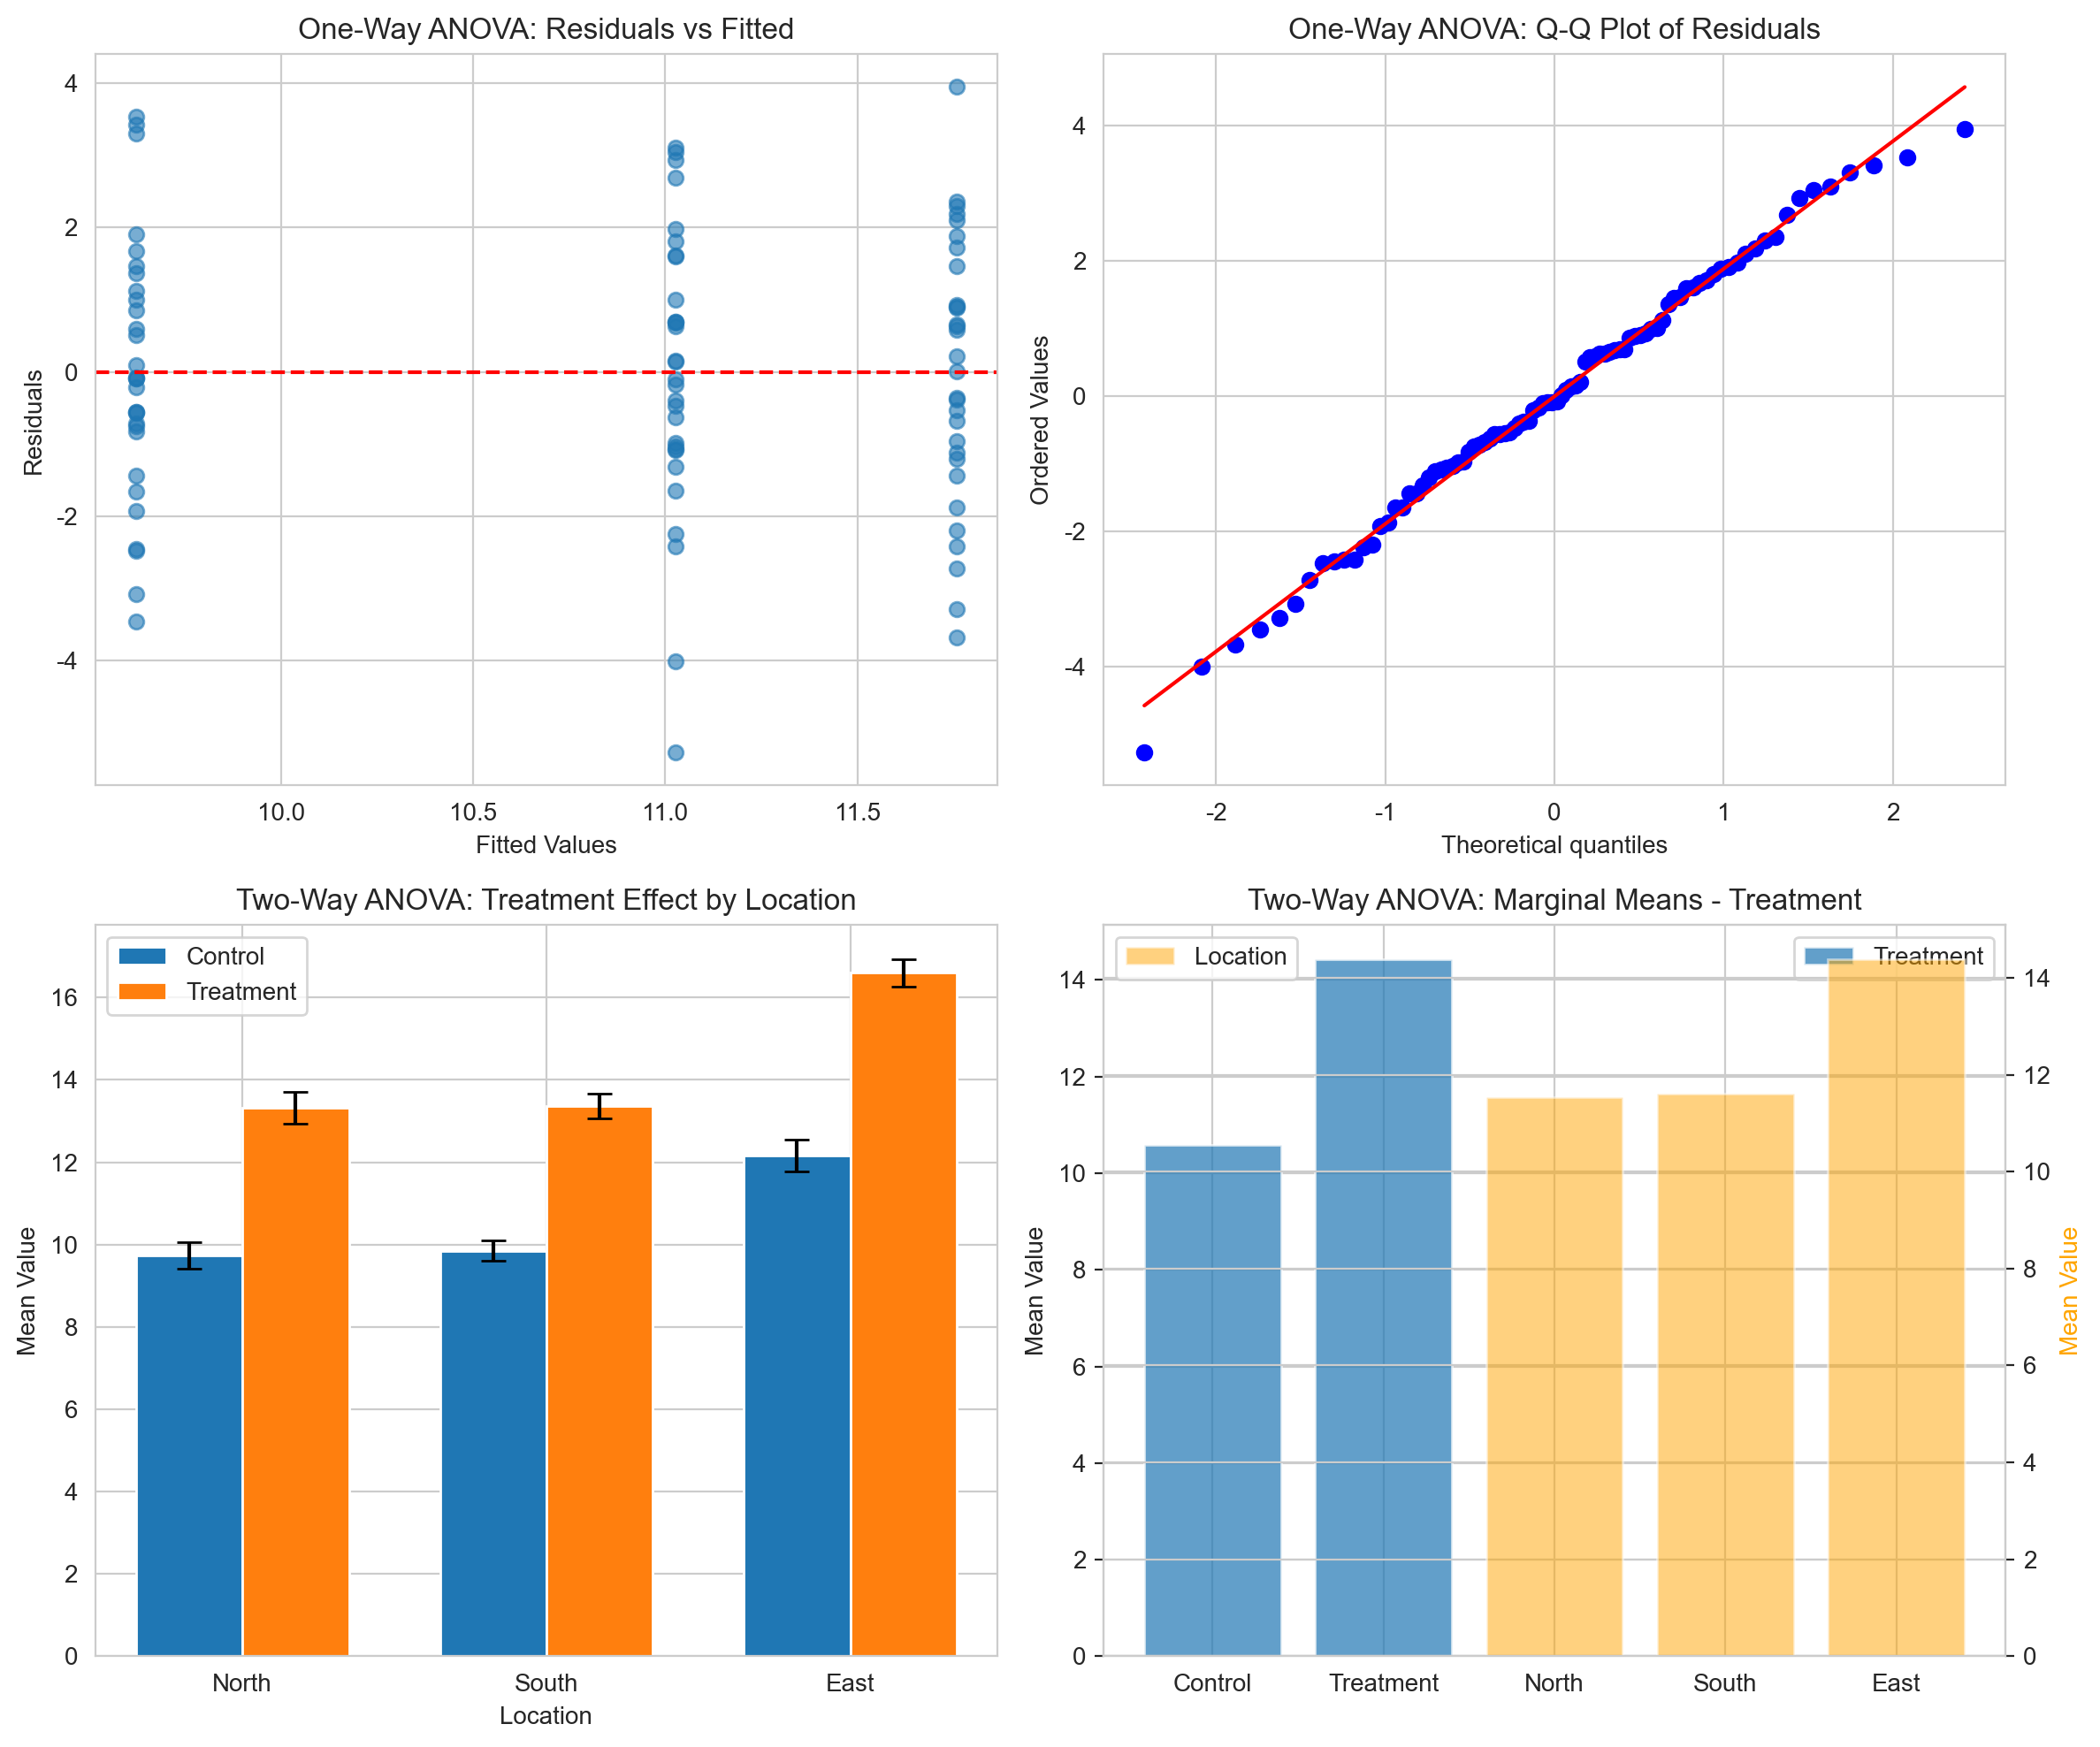


=== ASSUMPTION CHECKS ===
One-Way ANOVA Residuals Normality (Shapiro-Wilk):
  Statistic: 0.9925, p-value: 0.8948
  Normality assumption: Passed

One-Way ANOVA Homogeneity of Variance (Levene's Test):
  Statistic: 0.1480, p-value: 0.8627
  Homogeneity assumption: Passed


In [7]:
# Visualization of ANOVA results
fig, axes = plt.subplots(2, 2)

# Residuals plot for one-way ANOVA
fitted_values_1way = np.concatenate([
    [group_stats[group_stats['group'] == g]['mean'].values[0]] * n_per_group
    for g in ['Group A', 'Group B', 'Group C']
])
residuals_1way = one_way_df['value'] - fitted_values_1way

axes[0,0].scatter(fitted_values_1way, residuals_1way, alpha=0.6)
axes[0,0].axhline(y=0, color='r', linestyle='--')
axes[0,0].set_xlabel('Fitted Values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('One-Way ANOVA: Residuals vs Fitted')

# Normal Q-Q plot for one-way ANOVA residuals
stats.probplot(residuals_1way, dist="norm", plot=axes[0,1])
axes[0,1].set_title('One-Way ANOVA: Q-Q Plot of Residuals')

# Interaction plot with confidence intervals
interaction_means = two_way_df.groupby(['treatment', 'location'])['value'].mean().unstack()
interaction_se = two_way_df.groupby(['treatment', 'location'])['value'].sem().unstack()

x_pos = np.arange(len(locations))
width = 0.35

axes[1,0].bar(x_pos - width/2, interaction_means.loc['Control'], width,
              label='Control', yerr=interaction_se.loc['Control'], capsize=5)
axes[1,0].bar(x_pos + width/2, interaction_means.loc['Treatment'], width,
              label='Treatment', yerr=interaction_se.loc['Treatment'], capsize=5)
axes[1,0].set_xlabel('Location')
axes[1,0].set_ylabel('Mean Value')
axes[1,0].set_title('Two-Way ANOVA: Treatment Effect by Location')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(locations)
axes[1,0].legend()

# Means plot for two-way ANOVA
treatment_means = two_way_df.groupby('treatment')['value'].mean()
location_means = two_way_df.groupby('location')['value'].mean()

axes[1,1].bar(['Control', 'Treatment'], treatment_means.values, alpha=0.7, label='Treatment')
axes[1,1].set_ylabel('Mean Value')
axes[1,1].set_title('Two-Way ANOVA: Marginal Means - Treatment')
axes[1,1].legend()

# Add a second y-axis for location means
ax2 = axes[1,1].twinx()
ax2.bar(['North', 'South', 'East'], location_means.values, alpha=0.5, color='orange', label='Location')
ax2.set_ylabel('Mean Value', color='orange')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Assumption checks
print("\n=== ASSUMPTION CHECKS ===")

# Normality test for one-way ANOVA residuals
shapiro_stat, shapiro_p = stats.shapiro(residuals_1way)
print(f"One-Way ANOVA Residuals Normality (Shapiro-Wilk):")
print(f"  Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
print(f"  Normality assumption: {'Passed' if shapiro_p > 0.05 else 'Failed'}")

# Homogeneity of variance test (Levene's test) for one-way ANOVA
group_a = one_way_df[one_way_df['group'] == 'Group A']['value']
group_b = one_way_df[one_way_df['group'] == 'Group B']['value']
group_c = one_way_df[one_way_df['group'] == 'Group C']['value']
levene_stat, levene_p = stats.levene(group_a, group_b, group_c)
print(f"\nOne-Way ANOVA Homogeneity of Variance (Levene's Test):")
print(f"  Statistic: {levene_stat:.4f}, p-value: {levene_p:.4f}")
print(f"  Homogeneity assumption: {'Passed' if levene_p > 0.05 else 'Failed'}")

In [8]:
# Detailed post-hoc analysis and interpretation
print("=== DETAILED POST-HOC ANALYSIS ===")

if p_value_1way < 0.05:
    print("Since the one-way ANOVA was significant, we proceed with post-hoc analysis.")

    # Pairwise t-tests with Bonferroni correction
    from scipy.stats import ttest_ind
    groups = ['Group A', 'Group B', 'Group C']
    alpha_bonferroni = 0.05 / 3  # 3 comparisons

    print(f"Pairwise comparisons with Bonferroni correction (α = {alpha_bonferroni:.4f}):")

    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1_data = one_way_df[one_way_df['group'] == groups[i]]['value']
            group2_data = one_way_df[one_way_df['group'] == groups[j]]['value']

            t_stat, p_val = ttest_ind(group1_data, group2_data)
            print(f"  {groups[i]} vs {groups[j]}: t = {t_stat:.4f}, p = {p_val:.4f}, "
                  f"Significant: {'Yes' if p_val < alpha_bonferroni else 'No'}")
else:
    print("One-way ANOVA was not significant, no need for post-hoc analysis.")

# Calculate practical significance measures
print(f"\n=== PRACTICAL SIGNIFICANCE ===")
print(f"One-way ANOVA Effect Size (Eta-squared): {eta_squared:.4f}")
print(f"Interpretation: {('Large' if eta_squared >= 0.14 else 'Medium' if eta_squared >= 0.06 else 'Small') if eta_squared > 0.01 else 'Negligible'} effect")

print(f"\nTwo-way ANOVA Effect Sizes:")
print(f"  Treatment: {partial_eta_sq_treatment:.4f} ({'Large' if partial_eta_sq_treatment >= 0.14 else 'Medium' if partial_eta_sq_treatment >= 0.06 else 'Small' if partial_eta_sq_treatment >= 0.01 else 'Negligible'})")
print(f"  Location: {partial_eta_sq_location:.4f} ({'Large' if partial_eta_sq_location >= 0.14 else 'Medium' if partial_eta_sq_location >= 0.06 else 'Small' if partial_eta_sq_location >= 0.01 else 'Negligible'})")
print(f"  Interaction: {partial_eta_sq_interaction:.4f} ({'Large' if partial_eta_sq_interaction >= 0.14 else 'Medium' if partial_eta_sq_interaction >= 0.06 else 'Small' if partial_eta_sq_interaction >= 0.01 else 'Negligible'})")

=== DETAILED POST-HOC ANALYSIS ===
Since the one-way ANOVA was significant, we proceed with post-hoc analysis.
Pairwise comparisons with Bonferroni correction (α = 0.0167):
  Group A vs Group B: t = -4.5129, p = 0.0000, Significant: Yes
  Group A vs Group C: t = -2.8667, p = 0.0058, Significant: Yes
  Group B vs Group C: t = 1.4733, p = 0.1461, Significant: No

=== PRACTICAL SIGNIFICANCE ===
One-way ANOVA Effect Size (Eta-squared): 0.1860
Interpretation: Large effect

Two-way ANOVA Effect Sizes:
  Treatment: 0.6374 (Large)
  Location: 0.4552 (Large)
  Interaction: 0.0208 (Small)
